House Prices - Advanced Regression Techniques

Abstract/Introduction

In [1]:
# Python tools 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix

import sklearn
from sklearn.preprocessing import OneHotEncoder as O_H_E


In [2]:
#Importing Original Data Set (Kaggle DS)
# ODF_test_HP = pd.read_csv('ODS_test.csv')     # Original Test-Data set 
# ODF_train_HP = pd.read_csv('ODS_train.csv')   # Original Train-Data set


In [3]:
# Importing Data Set from NYCDSA
AMES_RED = pd.read_csv('Ames_Real_Estate_Data.csv')    
AMES_HP = pd.read_csv('Ames_HousePrice.csv')          


/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
AMES_HP.shape

(2580, 82)

In [5]:
AMES_HP.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [6]:
AMES_HP.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

Text(0.5, 1.0, 'Features Correlation with SalePrice')

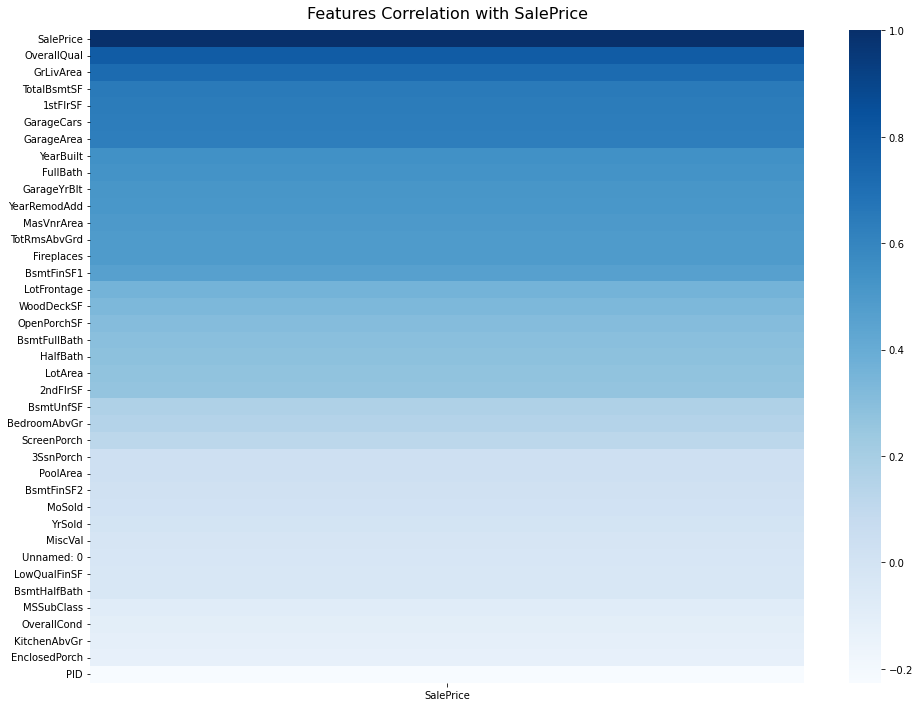

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
heatmap_AMES = sns.heatmap(AMES_HP.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), cmap='Blues', xticklabels=True, yticklabels=True)
heatmap_AMES.set_title('Features Correlation with SalePrice', fontdict={'fontsize':16}, pad=12)

In [8]:
AMES_HP.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790501
GrLivArea,0.719981
TotalBsmtSF,0.652222
1stFlrSF,0.642613
GarageCars,0.638801
GarageArea,0.634992
YearBuilt,0.544370
FullBath,0.534982
GarageYrBlt,0.520763


In [9]:
train_HP = AMES_HP.iloc[:,[3,2,4,5,7,15,16,18,19,20,21,22,23,29,37,41,46,51,55,56,58,63,64]].copy()

In [10]:
train_HP.head()

,SalePrice,GrLivArea,MSSubClass,MSZoning,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,126000,856,30,RL,7890,SWISU,Norm,1Fam,1Story,6,...,0.0,238.0,856.0,856,1,TA,4,1,2.0,399.0
1,139500,1049,120,RL,4235,Edwards,Norm,TwnhsE,1Story,5,...,149.0,552.0,1049.0,1049,2,Gd,5,0,1.0,266.0
2,124900,1001,30,C (all),6060,IDOTRR,Norm,1Fam,1Story,5,...,0.0,737.0,837.0,1001,1,Gd,5,0,1.0,216.0
3,114000,1039,70,RL,8146,OldTown,Norm,1Fam,2Story,4,...,0.0,0.0,405.0,717,1,TA,6,0,1.0,281.0
4,227000,1665,60,RL,8400,NWAmes,Norm,1Fam,2Story,8,...,0.0,643.0,810.0,810,2,Gd,6,0,2.0,528.0


In [11]:
train_HP.describe()

,SalePrice,GrLivArea,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2579.000000,2579.000000
mean,178059.623256,1486.039922,57.691860,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,1036.686700,1144.975194,1.550775,6.387209,0.604264,1.747577,466.842575
std,75031.089374,488.650181,42.802105,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,418.555417,375.958955,0.545825,1.535186,0.648604,0.738678,207.476842
min,12789.000000,334.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,129975.000000,1112.000000,20.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,792.000000,871.750000,1.000000,5.000000,0.000000,1.000000,318.000000
50%,159900.000000,1436.000000,50.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,979.000000,1071.000000,2.000000,6.000000,1.000000,2.000000,474.000000
75%,209625.000000,1733.000000,70.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,1266.500000,1364.000000,2.000000,7.000000,1.000000,2.000000,576.000000
max,755000.000000,4676.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,3206.000000,3820.000000,4.000000,13.000000,4.000000,5.000000,1488.000000


In [12]:
train_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2580 non-null   int64  
 1   GrLivArea     2580 non-null   int64  
 2   MSSubClass    2580 non-null   int64  
 3   MSZoning      2580 non-null   object 
 4   LotArea       2580 non-null   int64  
 5   Neighborhood  2580 non-null   object 
 6   Condition1    2580 non-null   object 
 7   BldgType      2580 non-null   object 
 8   HouseStyle    2580 non-null   object 
 9   OverallQual   2580 non-null   int64  
 10  OverallCond   2580 non-null   int64  
 11  YearBuilt     2580 non-null   int64  
 12  YearRemodAdd  2580 non-null   int64  
 13  MasVnrArea    2566 non-null   float64
 14  BsmtFinSF1    2579 non-null   float64
 15  TotalBsmtSF   2579 non-null   float64
 16  1stFlrSF      2580 non-null   int64  
 17  FullBath      2580 non-null   int64  
 18  KitchenQual   2580 non-null 

Types of Data: Categorical vs Numerical

In [13]:
train_HP.nunique() # Observation of what Type of Data (Categorical or Numerical) is in the Dataset

SalePrice        870
GrLivArea       1213
MSSubClass        16
MSZoning           7
LotArea         1753
Neighborhood      28
Condition1         9
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        114
YearRemodAdd      61
MasVnrArea       416
BsmtFinSF1       927
TotalBsmtSF      989
1stFlrSF        1026
FullBath           5
KitchenQual        5
TotRmsAbvGrd      12
Fireplaces         5
GarageCars         6
GarageArea       573
dtype: int64

/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


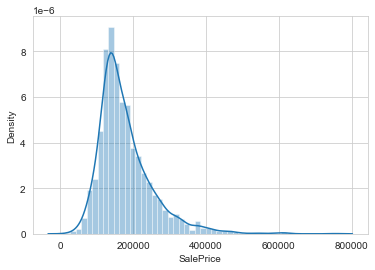

/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


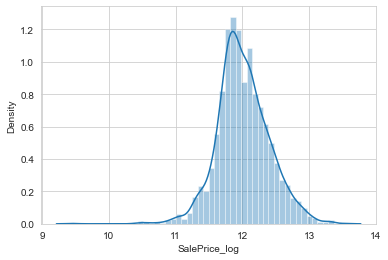

In [14]:
natural_SP = train_HP.SalePrice
sns.set_style("whitegrid")
sns.distplot(natural_SP)
plt.show()

train_HP["SalePrice_log"] = np.log(train_HP.SalePrice)
log_SP = train_HP.SalePrice_log
sns.distplot(log_SP)
plt.show()

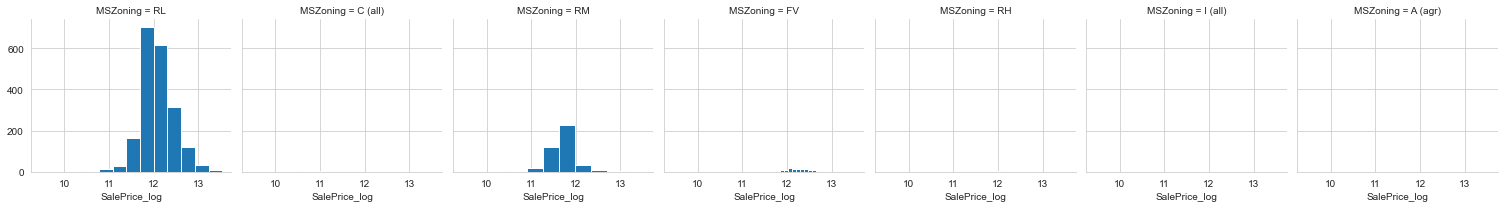

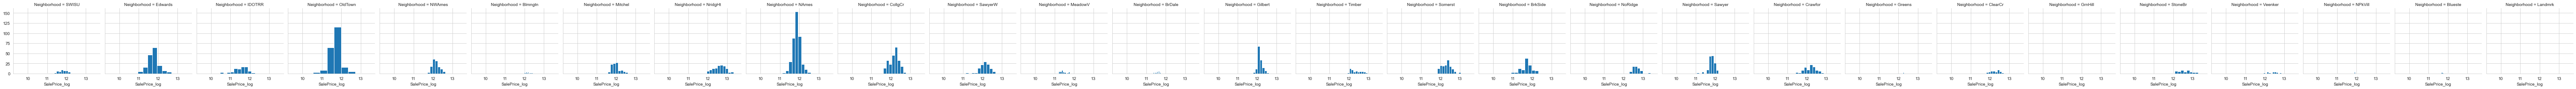

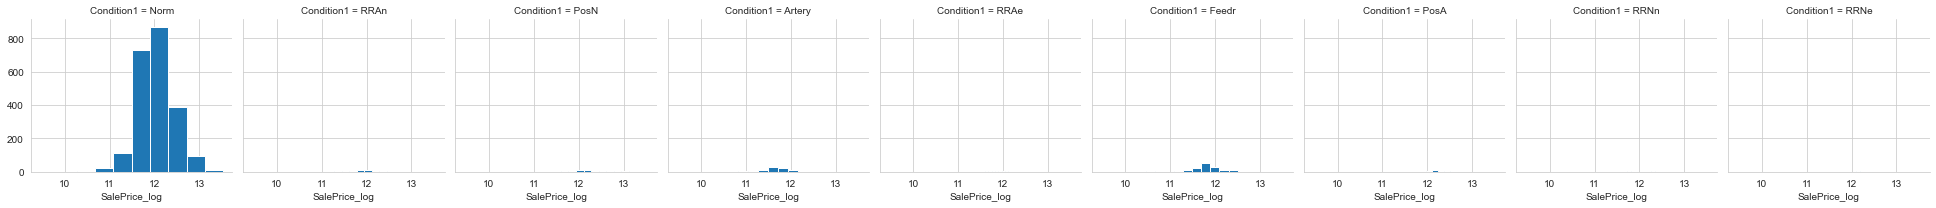

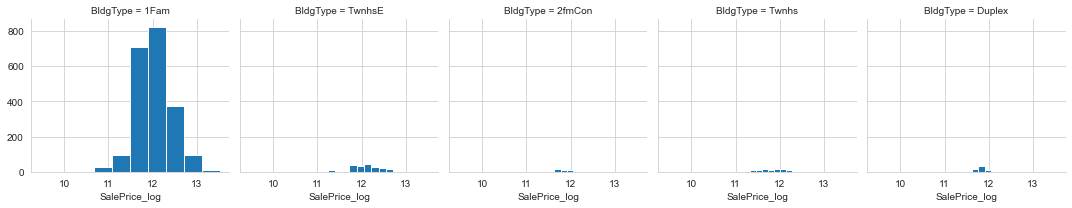

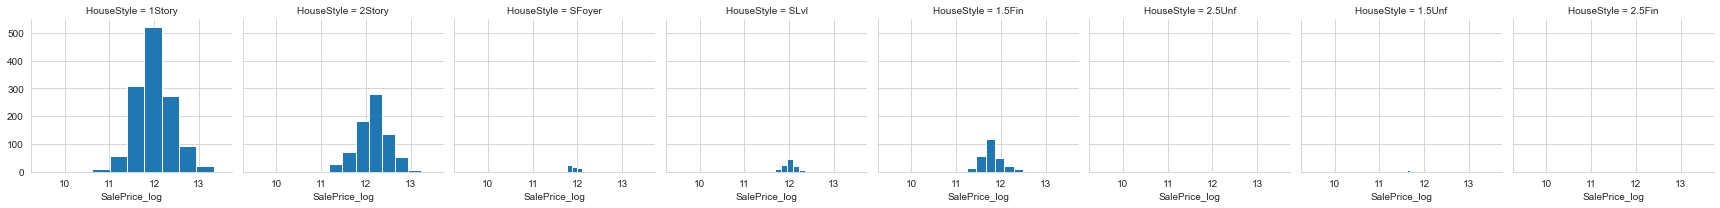

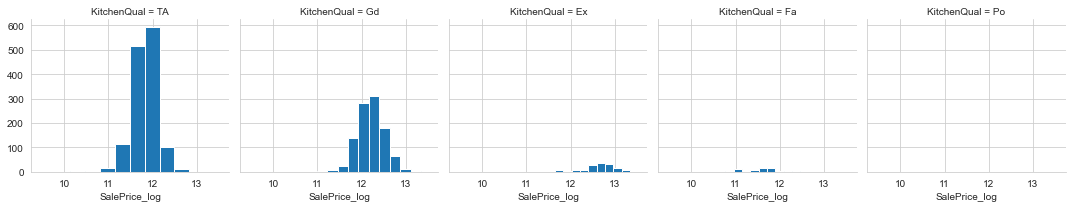

In [15]:
# Categorical Variables

features = train_HP.select_dtypes(include=['object']).columns

for features in features:
    h_p = sns.FacetGrid(train_HP, col=features)
    h_p.map(plt.hist, 'SalePrice_log');

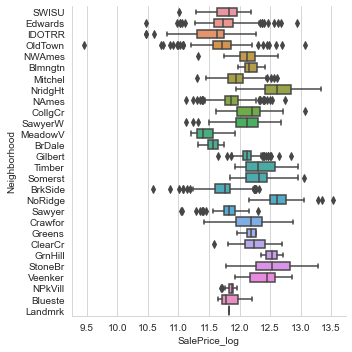

In [16]:
sns.catplot(y='Neighborhood', x='SalePrice_log', kind="box", data=train_HP)

<BarContainer object of 2580 artists>

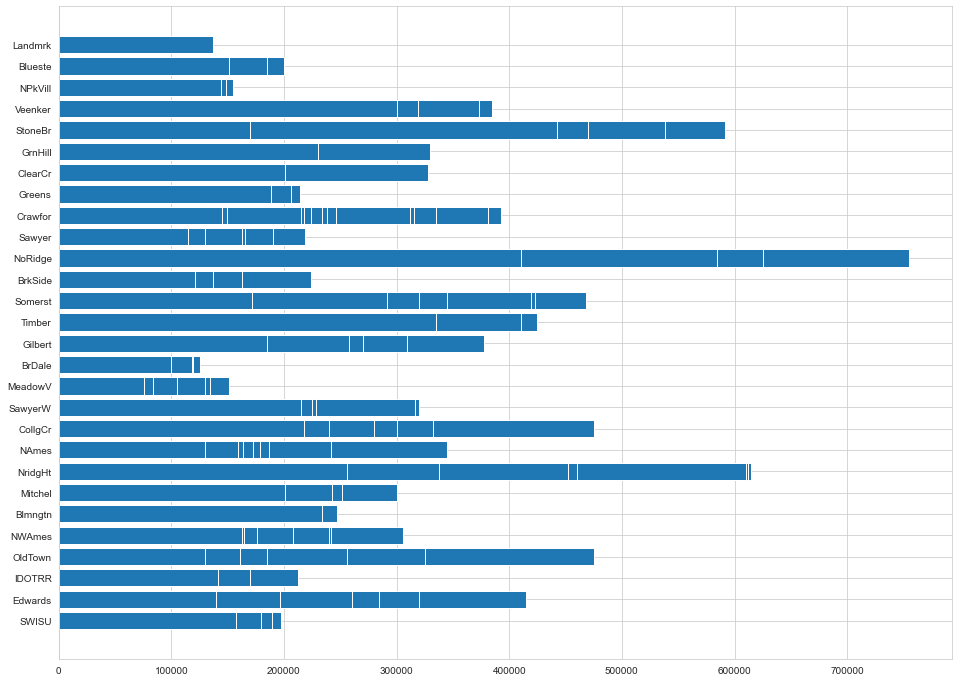

In [17]:
f, ax = plt.subplots(figsize=(16, 12))
y=train_HP['Neighborhood']
x=np.exp(train_HP['SalePrice_log'])
plt.barh(y,x)

/var/folders/1y/cny3d1jj32j3d5d0h2z7nx9r0000gn/T/ipykernel_4320/3572732538.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

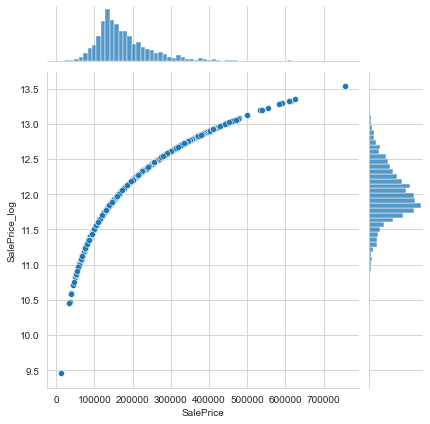

<Figure size 720x720 with 0 Axes>

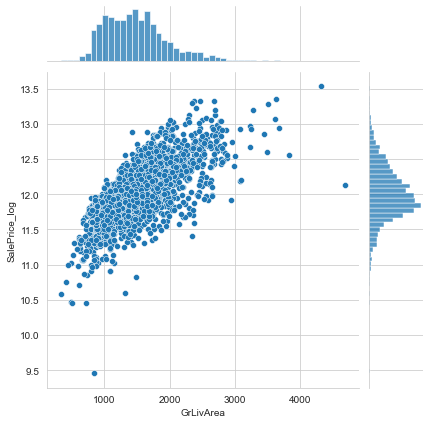

<Figure size 720x720 with 0 Axes>

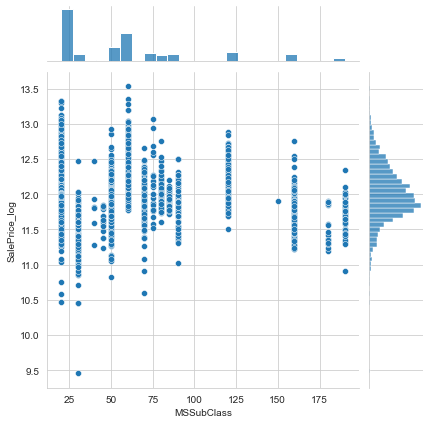

<Figure size 720x720 with 0 Axes>

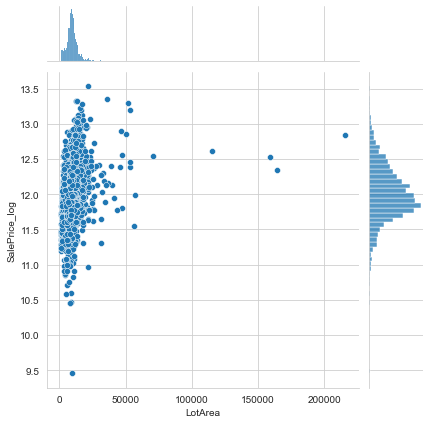

<Figure size 720x720 with 0 Axes>

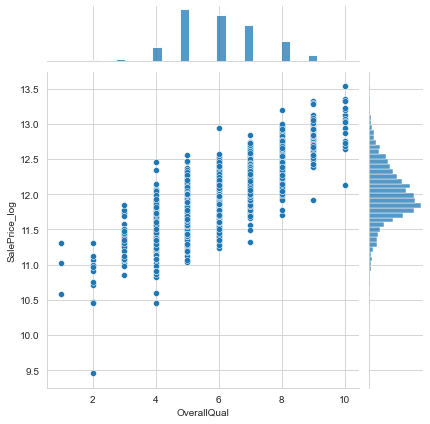

<Figure size 720x720 with 0 Axes>

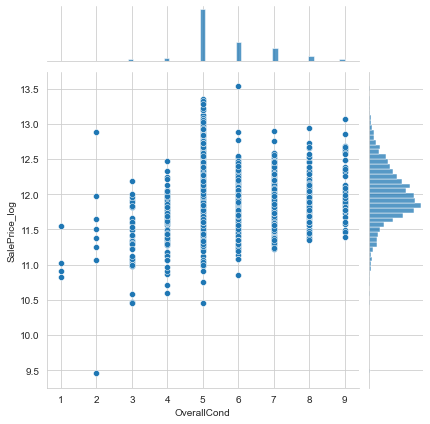

<Figure size 720x720 with 0 Axes>

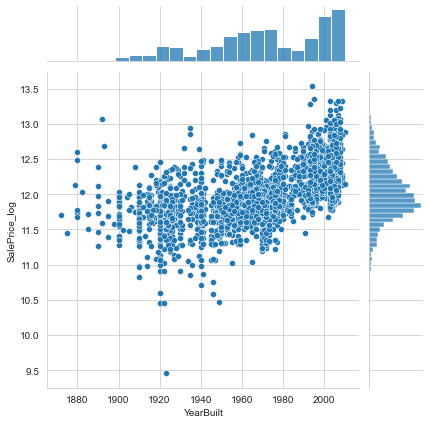

<Figure size 720x720 with 0 Axes>

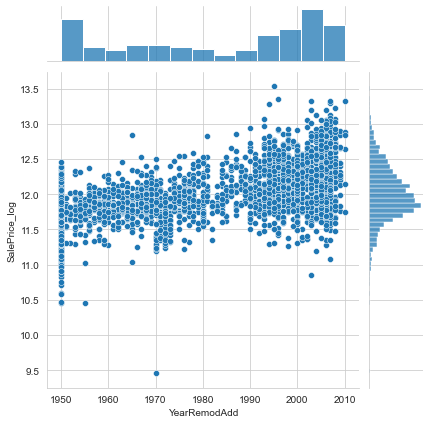

<Figure size 720x720 with 0 Axes>

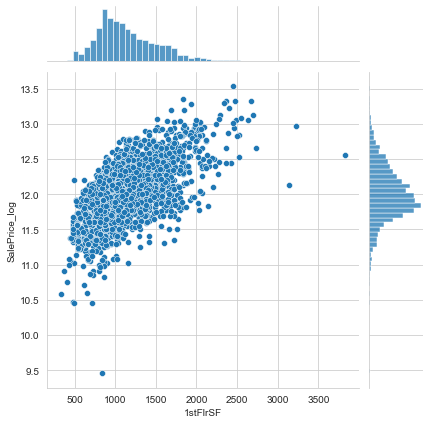

<Figure size 720x720 with 0 Axes>

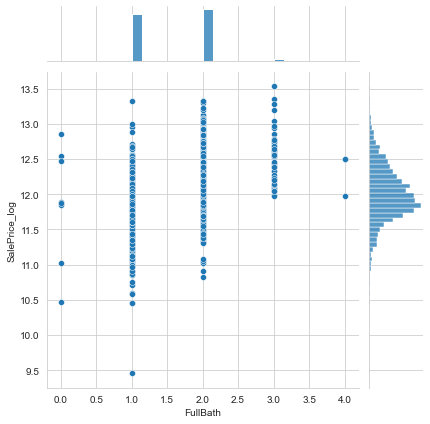

<Figure size 720x720 with 0 Axes>

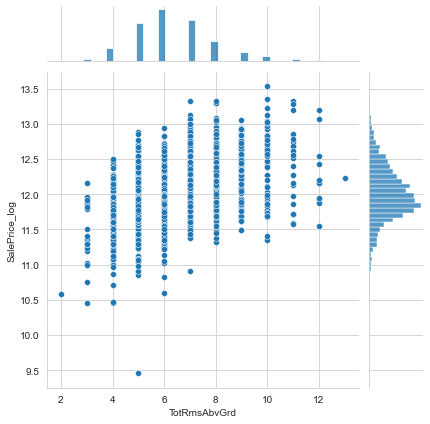

<Figure size 720x720 with 0 Axes>

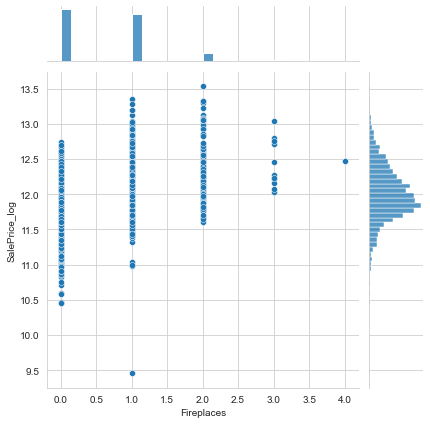

In [18]:
# Numerical Variables

y = train_HP.SalePrice_log

features = train_HP.select_dtypes(include=['int64']).columns

for features in features:
    plt.figure(figsize=(10, 10))
    x = train_HP[features]
    sns.jointplot(x=x, y=y, data=train_HP)

Missing Values

In [19]:
train_HP.isnull().sum()*100/len(train_HP) # % Missing values     

SalePrice        0.000000
GrLivArea        0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.542636
BsmtFinSF1       0.038760
TotalBsmtSF      0.038760
1stFlrSF         0.000000
FullBath         0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.038760
GarageArea       0.038760
SalePrice_log    0.000000
dtype: float64

<AxesSubplot:>

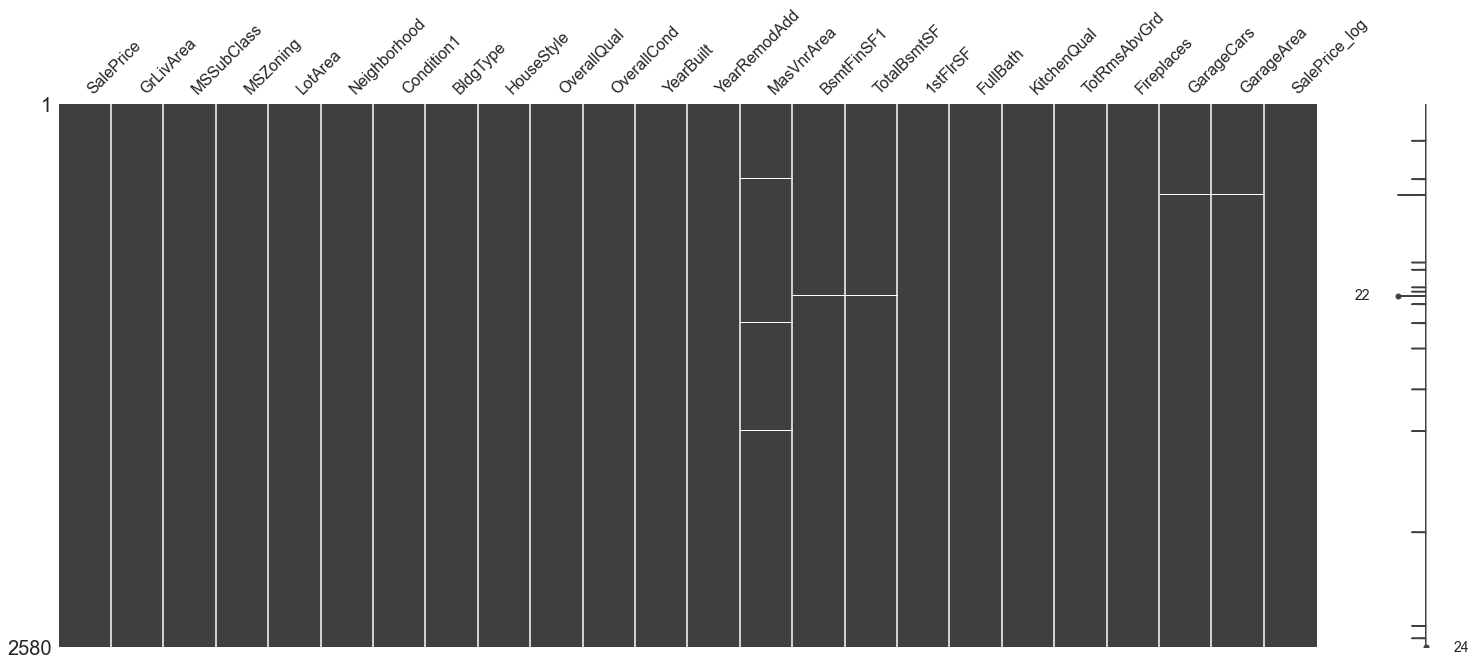

In [20]:
msno.matrix(train_HP) # Heatmap for missing values

In [21]:
train_HP = train_HP.fillna(train_HP['GarageCars'].value_counts().index[0])

train_HP = train_HP.fillna(train_HP['GarageArea'].value_counts().index[0])
train_HP = train_HP.fillna(train_HP['TotalBsmtSF'].value_counts().index[0])
train_HP = train_HP.fillna(train_HP['BsmtFinSF1'].value_counts().index[0])
train_HP = train_HP.fillna(train_HP['MasVnrArea'].value_counts().index[0])



<AxesSubplot:>

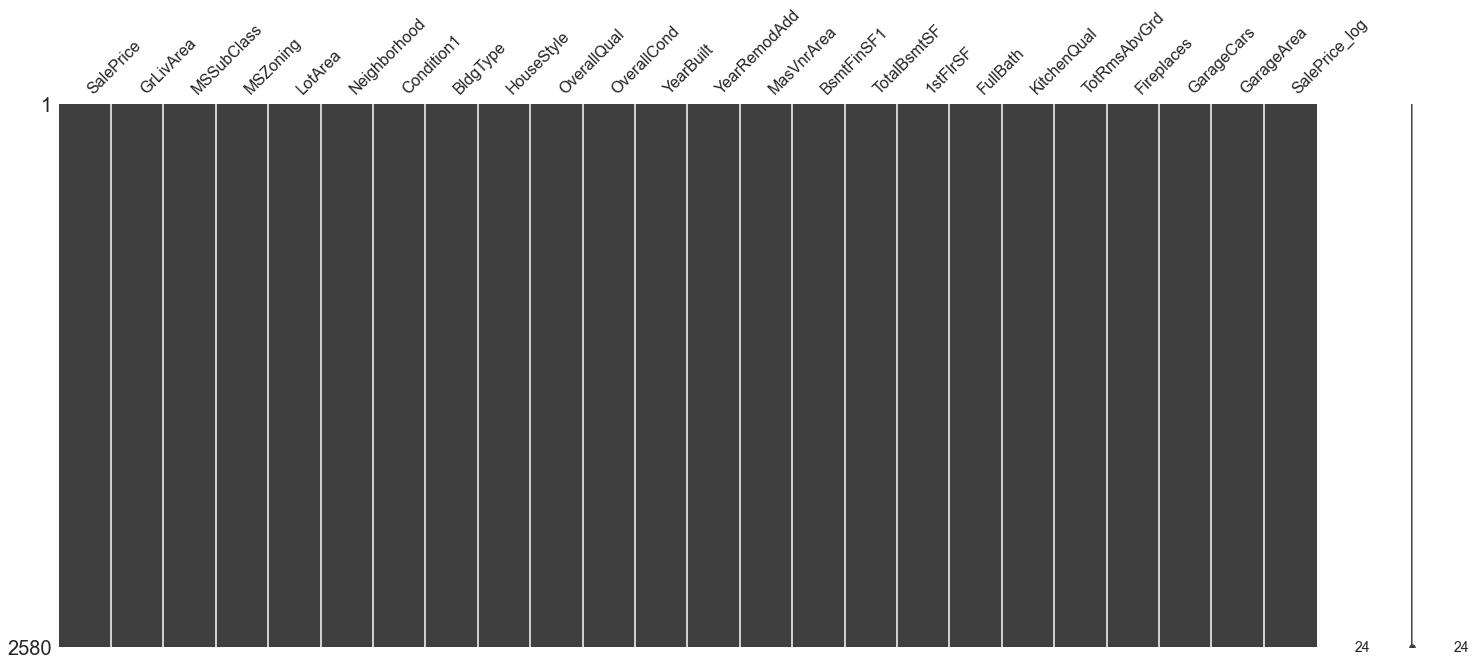

In [22]:
msno.matrix(train_HP) # Heatmap for missing values

In [23]:
nan_val = train_HP.isna()
nan_columns = nan_val.any()
columns_with_nan = train_HP.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [24]:
train_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotArea        2580 non-null   int64  
 5   Neighborhood   2580 non-null   object 
 6   Condition1     2580 non-null   object 
 7   BldgType       2580 non-null   object 
 8   HouseStyle     2580 non-null   object 
 9   OverallQual    2580 non-null   int64  
 10  OverallCond    2580 non-null   int64  
 11  YearBuilt      2580 non-null   int64  
 12  YearRemodAdd   2580 non-null   int64  
 13  MasVnrArea     2580 non-null   float64
 14  BsmtFinSF1     2580 non-null   float64
 15  TotalBsmtSF    2580 non-null   float64
 16  1stFlrSF       2580 non-null   int64  
 17  FullBath       2580 non-null   int64  
 18  KitchenQ

In [25]:
# Preprocessing Categorical Variables

MSSUbCLass = {
    20: "1-STORY 1946 & NEWER",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC",
    45: "1-1/2 STORY UNFINISHED",
    50: "1-1/2 STORY FINISHED",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX ALL STYLES AND AGES",
    120: "1-STORY PUD 1946 & NEWER",
    150: "1-1/2 STORY PUD ALL AGES",
    160: "2-STORY PUD 1946 & NEWER",
    180: "PUD MULTILEVEL",
    190: "2 FAMILY CONVERSION",
}

train_HP.replace(
    {
       "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


Data Analysis / Visualizing / Correlation / Heatmap / Encode categorical

In [26]:
train_HP.drop(['SalePrice'], axis=1, inplace=True)
first_column = train_HP.pop('SalePrice_log')
train_HP.insert(0, 'SalePrice_log', first_column)

Text(0.5, 1.0, 'Correlation Heatmap')

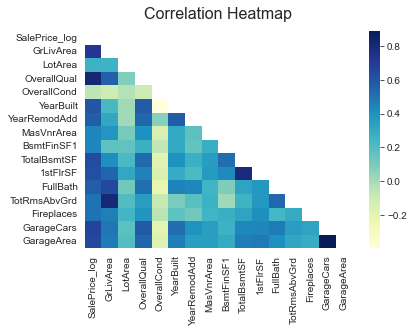

In [27]:
# correlation matrix

#sns.heatmap(train_HP.corr(), cmap='YlGnBu', xticklabels=True, yticklabels=True)

mask = np.triu(np.ones_like(train_HP.corr(), dtype=np.bool_))
heatmap_APS = sns.heatmap(train_HP.corr(), mask=mask, cmap='YlGnBu', xticklabels=True, yticklabels=True)
heatmap_APS.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

In [28]:
train_HP.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False)

,SalePrice_log
SalePrice_log,1.000000
OverallQual,0.815961
GrLivArea,0.717711
GarageCars,0.666475
GarageArea,0.645299
TotalBsmtSF,0.642250
1stFlrSF,0.623993
YearBuilt,0.597186
FullBath,0.571038
YearRemodAdd,0.562123


Text(0.5, 1.0, 'Features Correlation with Satisfaction')

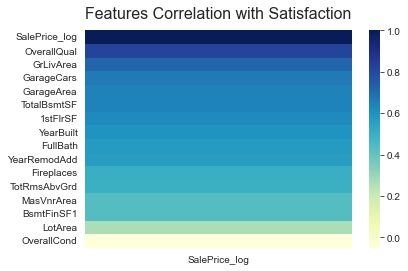

In [29]:
heatmap_HP = sns.heatmap(train_HP.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), cmap='YlGnBu', xticklabels=True, yticklabels=True)
heatmap_HP.set_title('Features Correlation with Satisfaction', fontdict={'fontsize':16}, pad=12)

In [30]:
train_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice_log  2580 non-null   float64
 1   GrLivArea      2580 non-null   int64  
 2   MSSubClass     2580 non-null   object 
 3   MSZoning       2580 non-null   object 
 4   LotArea        2580 non-null   int64  
 5   Neighborhood   2580 non-null   object 
 6   Condition1     2580 non-null   object 
 7   BldgType       2580 non-null   object 
 8   HouseStyle     2580 non-null   object 
 9   OverallQual    2580 non-null   int64  
 10  OverallCond    2580 non-null   int64  
 11  YearBuilt      2580 non-null   int64  
 12  YearRemodAdd   2580 non-null   int64  
 13  MasVnrArea     2580 non-null   float64
 14  BsmtFinSF1     2580 non-null   float64
 15  TotalBsmtSF    2580 non-null   float64
 16  1stFlrSF       2580 non-null   int64  
 17  FullBath       2580 non-null   int64  
 18  KitchenQ

In [31]:
train_HP.drop(['LotArea', 'OverallCond'], axis=1, inplace=True)

In [32]:
class OneHotEncoder(O_H_E):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


def transform(Train, Tdf):

    categorical_ = Tdf.select_dtypes(include=["object"]).columns
    categorical_df = Tdf[categorical_]
    numerical_df = Tdf.select_dtypes(include=np.number)

    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    ohe.fit(Train[categorical_])
    categorical_processed = ohe.transform(categorical_df)

    OHEncoded_ = pd.concat([categorical_processed, numerical_df], axis=1)

    return OHEncoded_


In [33]:
Train_encoded = transform(train_HP, train_HP)

In [34]:
Aux_TE = Train_encoded.copy()

In [35]:
Train_encoded.head()

,MSSubClass_<1-1/2 STORY FINISHED>,MSSubClass_<1-1/2 STORY PUD ALL AGES>,MSSubClass_<1-1/2 STORY UNFINISHED>,MSSubClass_<1-STORY 1945 & OLDER>,MSSubClass_<1-STORY 1946 & NEWER>,MSSubClass_<1-STORY PUD 1946 & NEWER>,MSSubClass_<1-STORY W/FINISHED ATTIC>,MSSubClass_<2 FAMILY CONVERSION>,MSSubClass_<2-1/2 STORY>,MSSubClass_<2-STORY 1945 & OLDER>,...,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950,0.0,238.0,856.0,856,1,4,1,2.0,399.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1984,149.0,552.0,1049.0,1049,2,5,0,1.0,266.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2007,0.0,737.0,837.0,1001,1,5,0,1.0,216.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2003,0.0,0.0,405.0,717,1,6,0,1.0,281.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2001,0.0,643.0,810.0,810,2,6,0,2.0,528.0


In [36]:
from sklearn.model_selection import train_test_split
HP_labels = Train_encoded.pop('SalePrice_log') #Label
HP_feature = Train_encoded #Remove label from DF

X_train, X_test, y_train, y_test = train_test_split(HP_feature, HP_labels, test_size=0.3)

In [37]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5) 
    
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(X_train, y_train)

    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model


In [38]:
# Decision Tree Model

param_grid = {"max_depth": [5, 10, 30], "max_features": [0.1, 0.3, 0.7]}
model1 = DecisionTreeRegressor(criterion="mse", random_state=0)
Tuned_Model = model_pipeline(model1, param_grid, "neg_root_mean_squared_error")


running model
0.29201300000000074 Seconds
finished running model


In [39]:
from sklearn.metrics import mean_squared_error
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred1)), '.5f'))
print("\nRMSE: ", rmse)



RMSE:  0.19195


In [40]:
from sklearn import metrics
model1.score(X_train, y_train)

0.9999537079524203

In [41]:
model1.score(X_test, y_test)

0.7274109892862278

In [42]:
errors1 = abs((y_pred1 - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors1), 2)) 

Mean Relative Error: 0.01


In [43]:
metrics.r2_score(y_test,y_pred1)

0.7274109892862278

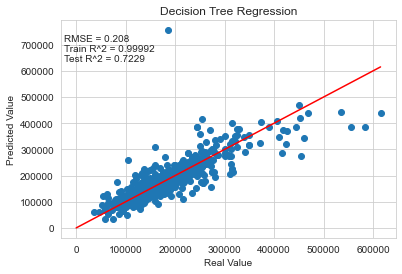

In [44]:
import matplotlib.pyplot as plt
plt.scatter(np.exp(y_test), np.exp(y_pred1))
plt.title('Decision Tree Regression')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
linear_rep = np.linspace(0, np.max(np.exp(y_test)), 100)
plt.plot(linear_rep, linear_rep, '-r')

plt.text(-0.09, 0.18, "RMSE = 0.208 \nTrain R^2 = 0.99992 \nTest R^2 = 0.7229", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)

plt.show()


/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


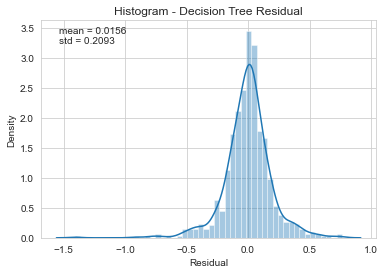

mean: -0.0017
std: 0.1919


In [45]:
residual1 = (y_test - y_pred1)

sns.set_style("whitegrid")
sns.distplot(residual1)
plt.xlabel("Residual")
plt.title("Histogram - Decision Tree Residual")
plt.text(-0.095, 0.2, "mean = 0.0156 \nstd = 0.2093", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()
         
print('mean: %.4f' %np.mean(residual1))   
print('std: %.4f' %np.std(residual1))            

In [46]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

param_grid = {"n_estimators": [200, 300, 400, 500, 600], "max_features": [0.1, 0.3, 0.6]}
model2 = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)
Tuned_Model2 = model_pipeline(model2, param_grid, "neg_root_mean_squared_error")


running model
29.565231999999998 Seconds
finished running model


In [47]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred2)), '.5f'))
print("\nRMSE: ", rmse)


RMSE:  0.13208


In [48]:
model2.score(X_train, y_train)

0.9825990616947897

In [49]:
model2.score(X_test, y_test)

0.8709379067348555

In [50]:
errors2 = abs((y_pred2 - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors2), 2)) 

Mean Relative Error: 0.01


In [51]:
metrics.r2_score(y_test,y_pred2)

0.8709379067348552

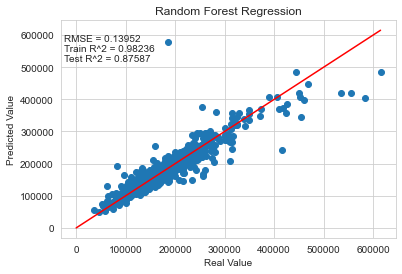

In [52]:
import matplotlib.pyplot as plt
plt.scatter(np.exp(y_test), np.exp(y_pred2))
plt.title('Random Forest Regression')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
linear_rep = np.linspace(0, np.max(np.exp(y_test)), 100)
plt.plot(linear_rep, linear_rep, '-r')
plt.text(-0.09, 0.18, "RMSE = 0.13952 \nTrain R^2 = 0.98236 \nTest R^2 = 0.87587", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()



/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


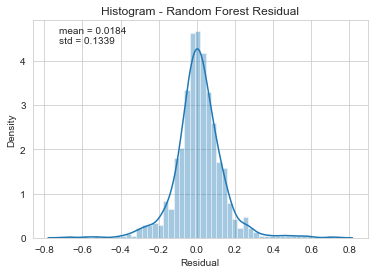

mean: 0.0101
std: 0.1262


In [53]:
residual2 = np.expm1(y_test - y_pred2)

sns.set_style("whitegrid")
sns.distplot(residual2)
plt.xlabel("Residual")
plt.title("Histogram - Random Forest Residual")
plt.text(-0.095, 0.2, "mean = 0.0184 \nstd = 0.1339", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()
         
print('mean: %.4f' %np.mean(residual2))   
print('std: %.4f' %np.std(residual2))            

In [54]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {"n_estimators": [300, 500, 1000], "max_depth": [5, 10, 30], "learning_rate": [0.01, 0.05, 0.1]}
model3 = GradientBoostingRegressor(random_state=0, max_features="sqrt")

Tuned_Model3 = model_pipeline(model3, param_grid, "neg_root_mean_squared_error")


running model
113.44873199999998 Seconds
finished running model


In [55]:
model3.fit(X_train, y_train)
y_pred3 = model2.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred3)), '.5f'))
print("\nRMSE: ", rmse)


RMSE:  0.13208


In [56]:
model3.score(X_train, y_train)

0.9327611444722478

In [57]:
model3.score(X_test, y_test)

0.8842743684795037

In [58]:
errors3 = abs((y_pred3 - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors3), 2)) 

Mean Relative Error: 0.01


In [59]:
metrics.r2_score(y_test,y_pred3)

0.8709379067348555

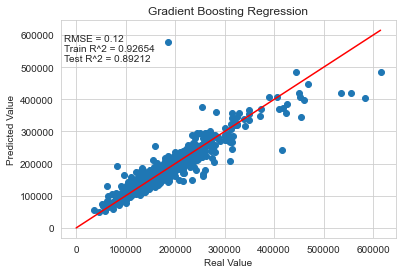

In [60]:
import matplotlib.pyplot as plt
plt.scatter(np.exp(y_test), np.exp(y_pred3))
plt.title('Gradient Boosting Regression')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
linear_rep = np.linspace(0, np.max(np.exp(y_test)), 100)
plt.plot(linear_rep, linear_rep, '-r')
plt.text(-0.09, 0.18, "RMSE = 0.12 \nTrain R^2 = 0.92654 \nTest R^2 = 0.89212", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()


/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


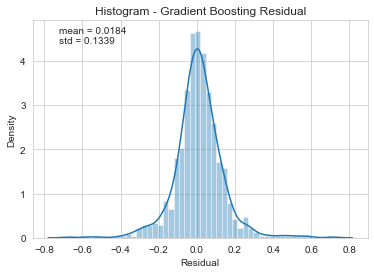

mean: 0.0101
std: 0.1262


In [61]:
residual3 = np.expm1(y_test - y_pred3)

sns.set_style("whitegrid")
sns.distplot(residual3)
plt.xlabel("Residual")
plt.title("Histogram - Gradient Boosting Residual")
plt.text(-0.095, 0.2, "mean = 0.0184 \nstd = 0.1339", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()
         
print('mean: %.4f' %np.mean(residual3))   
print('std: %.4f' %np.std(residual3))            

In [62]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train, y_train) 
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.913340
R^2 for test  set: 0.877952


In [66]:
y_pred4 = ols.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred2)), '.5f'))
print("\nRMSE: ", rmse)


RMSE:  0.13208


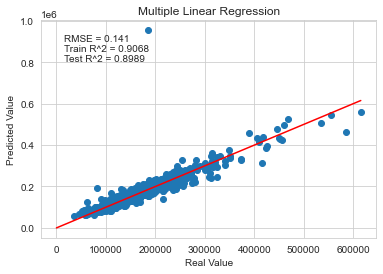

In [67]:
plt.scatter(np.exp(y_test), np.exp(y_pred4))
plt.title('Multiple Linear Regression')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
linear_rep = np.linspace(0, np.max(np.exp(y_test)), 100)
plt.plot(linear_rep, linear_rep, '-r')
plt.text(-0.09, 0.18, "RMSE = 0.141 \nTrain R^2 = 0.9068 \nTest R^2 = 0.8989", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()



/Users/jcuan10/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


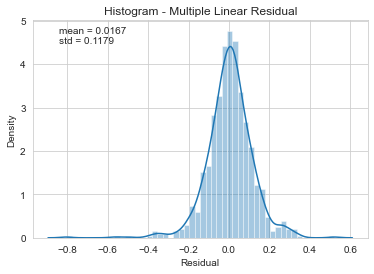

mean: 0.0040
std: 0.1129


In [68]:
residual4 = np.expm1(y_test - y_pred4)

sns.set_style("whitegrid")
sns.distplot(residual4)
plt.xlabel("Residual")
plt.title("Histogram - Multiple Linear Residual")
plt.text(-0.095, 0.2, "mean = 0.0167 \nstd = 0.1179", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.show()
         
print('mean: %.4f' %np.mean(residual4))   
print('std: %.4f' %np.std(residual4))            

In [ ]:
#Multiple Linear Regression is used to estimate the relationship between two or more independent variables and one dependent variable.
#Decision Tree is a simple decision making-diagram method to find patterns in data by learning decision rules.
#Random Forest is a multiclass object detection that builds decision trees in parallel to learn from data.
#Gradient Boosting Machine is a special framework of boosting algorithms that use a combination of decision tree results in series.

